In [32]:
import pickle
import os
import numpy as np
import copy
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import json

In [33]:
def get_acc_dicts_for_state(state_acc_dir_local):
    
    dh_pin_wise_acc_dict_local = {}
    pin_wise_acc_dict_local = {}
    for file in os.listdir(state_acc_dir_local):
        if file.endswith('.pickle'):
            dh_name = file.replace('acc_dh_', '').replace('.pickle', '')
            
            acc_file_path_local = os.path.join(state_acc_dir_local, file)
            acc_dict_local = load_acc(acc_file_path_local)
                
            dh_pin_wise_acc_dict_local[dh_name] = acc_dict_local
            
            for pin, pin_acc in dh_pin_wise_acc_dict_local[dh_name].items():
                pin_wise_acc_dict_local[pin] = pin_acc
            
    print('len of dh_wise_acc {} and len of pin_wise_acc {} '.format(len(dh_pin_wise_acc_dict_local), len(pin_wise_acc_dict_local)))
    return dh_pin_wise_acc_dict_local, pin_wise_acc_dict_local


def load_acc_dict_deb_9(acc_file_path_local):
    with open(acc_file_path_local, 'rb') as fp:
        acc_dict = pickle.load(fp)

        
    acc_dict_int = {}
    
    for k,v in acc_dict.items():
        acc_dict_int[int(k)] = v
    
    return acc_dict_int

pin_start_dig_list = ['1', '2', '3', '4', '5', '6', '7', '8']

phase_1_group_wise_acc_dict= {}
for pin_start_dig in pin_start_dig_list:
    acc_path = '/disk_4/grid_v21/data/dicts/misc/acc_grid_v2/test_acc_dict_grp_'+pin_start_dig+'.json'
    
    acc_dict = load_acc_dict_deb_9(acc_path)
    
    phase_1_group_wise_acc_dict[pin_start_dig] = acc_dict


phase_1_pin_wise_acc_dict_loaded = {}
for k,v in phase_1_group_wise_acc_dict.items():
    phase_1_pin_wise_acc_dict_loaded.update(v)

print(len(phase_1_pin_wise_acc_dict_loaded))

phase_1_pin_wise_acc_dict = {}

for k,v in phase_1_pin_wise_acc_dict_loaded.items():
    phase_1_pin_wise_acc_dict[str(k)] = v


def load_acc(acc_path_local):
    with open(acc_path_local, 'rb') as fp:
        acc_dict_local = pickle.load(fp)
    return acc_dict_local


def get_acc_dicts_for_state(state_acc_dir_local):
    
    dh_pin_wise_acc_dict_local = {}
    pin_wise_acc_dict_local = {}
    for file in os.listdir(state_acc_dir_local):
        if file.endswith('.pickle'):
            dh_name = file.replace('acc_dh_', '').replace('.pickle', '')
            
            acc_file_path_local = os.path.join(state_acc_dir_local, file)
            acc_dict_local = load_acc(acc_file_path_local)
                
            dh_pin_wise_acc_dict_local[dh_name] = acc_dict_local
            
            for pin, pin_acc in dh_pin_wise_acc_dict_local[dh_name].items():
                pin_wise_acc_dict_local[pin] = pin_acc
            
    print('len of dh_wise_acc {} and len of pin_wise_acc {} '.format(len(dh_pin_wise_acc_dict_local), len(pin_wise_acc_dict_local)))
    return dh_pin_wise_acc_dict_local, pin_wise_acc_dict_local


    
def get_all_pin_acc_dict(state_wise_pin_acc_dict_local):
    all_pin_wise_acc_dict_local = {}
    
    for state in state_wise_pin_acc_dict_local:
        for pin, pin_acc in state_wise_pin_acc_dict_local[state].items():
            all_pin_wise_acc_dict_local[pin] = pin_acc
            
            
    all_pin_wise_acc_dict_local_2 = {}
    for k,v in all_pin_wise_acc_dict_local.items():
        all_pin_wise_acc_dict_local_2[str(k)] = v
    
    
    print('len of all_pin_wise_acc_dict_local ', len(all_pin_wise_acc_dict_local_2))
    return all_pin_wise_acc_dict_local_2


state_to_do_list = ['PUDUCHERRY', 'JHARKHAND', 'SIKKIM', 'TRIPURA', 'HIMACHAL_PRADESH', 'MADHYA_PRADESH', 'ODISHA', 
                    'WEST_BENGAL', 'TAMIL_NADU', 'JAMMU_AND_KASHMIR', 'UTTARAKHAND', 'CHHATTISGARH', 'HARYANA', 
                    'ARUNACHAL_PRADESH', 'MEGHALAYA', 'PUNJAB', 'NAGALAND', 'MIZORAM', 'MAHARASHTRA', 'KARNATAKA',
                    'KERALA', 'CHANDIGARH', 'GUJARAT', 'RAJASTHAN', 'GOA', 'ASSAM', 'ANDHRA_PRADESH', 'BIHAR', 
                    'UTTAR_PRADESH', 'TELANGANA', 'MANIPUR']
state_wise_pin_acc_dict = {}
for state_to_do in state_to_do_list:
    state_acc_dir = '/disk_4/grid_v21/data/dicts/misc/dh_acc_dicts/dh_acc_dicts_L1/state_grp_'+state_to_do+'/'

    print('\n state ', state_to_do)
    dh_pin_wise_acc_dict, pin_wise_acc_dict = get_acc_dicts_for_state(state_acc_dir)
    
    state_wise_pin_acc_dict[state_to_do] = pin_wise_acc_dict
    
    
    
phase_II_pin_wise_acc_dict = get_all_pin_acc_dict(state_wise_pin_acc_dict)

better_btw_p_I_II = {}
all_pin_p1_vs_p2 = {}

for k,v in phase_1_pin_wise_acc_dict.items():
    if k in phase_II_pin_wise_acc_dict:
        p_I_acc = v['per'][500]
        p_II_acc = phase_II_pin_wise_acc_dict[k]['per'][500]
        
        
        if p_II_acc > p_I_acc + 0.01:
            better_btw_p_I_II[k] = "p2"
            all_pin_p1_vs_p2[k]  = "p2"
#             print(p_II_acc, p_I_acc)
        else:
            better_btw_p_I_II[k] = "p1"
            all_pin_p1_vs_p2[k]  = "p1"
            
            
            
    else:
        all_pin_p1_vs_p2[k]  = "p1"
        
for k,v in phase_II_pin_wise_acc_dict.items():
    if k not in all_pin_p1_vs_p2:
        all_pin_p1_vs_p2[k]  = "p2"
        
            
print('len(better_btw_p_I_II, len(all_pin_p1_vs_p2)) ', len(better_btw_p_I_II), len(all_pin_p1_vs_p2))

## merge p I & p II dicts
updated_phase_I_II_pin_wise_acc_dict = {}
only_phase_2_additional_pin_wise_acc_dict = {}
only_phase_1_additional_pin_wise_acc_dict = {}

for pin in all_pin_p1_vs_p2:
    if all_pin_p1_vs_p2[pin] == 'p1':
        updated_phase_I_II_pin_wise_acc_dict[pin] = phase_1_pin_wise_acc_dict[pin]
    else:
        updated_phase_I_II_pin_wise_acc_dict[pin] = phase_II_pin_wise_acc_dict[pin]
        
            
for pin in phase_II_pin_wise_acc_dict:
    if all_pin_p1_vs_p2[pin] == 'p2':
        only_phase_2_additional_pin_wise_acc_dict[pin] = phase_II_pin_wise_acc_dict[pin]

        
for pin in phase_1_pin_wise_acc_dict:
    if all_pin_p1_vs_p2[pin] == 'p1':
        only_phase_1_additional_pin_wise_acc_dict[pin] = phase_1_pin_wise_acc_dict[pin]
  
        
print(len(updated_phase_I_II_pin_wise_acc_dict), len(only_phase_2_additional_pin_wise_acc_dict), len(only_phase_1_additional_pin_wise_acc_dict))

def calculate_total_deliveries(acc_dict):
    total_deliveries = {}
    for pincode, data in acc_dict.items():
        num_2000 = data['num'].get(2000, 0)
        num_rest = data['num'].get('rest', 0)
        num_none = data['num'].get("None" , 0)
        total_deliveries[pincode] = num_2000 + num_rest
    return total_deliveries


total_deliveries = calculate_total_deliveries(updated_phase_I_II_pin_wise_acc_dict)


2144

 state  PUDUCHERRY
len of dh_wise_acc 2 and len of pin_wise_acc 22 

 state  JHARKHAND
len of dh_wise_acc 45 and len of pin_wise_acc 193 

 state  SIKKIM
len of dh_wise_acc 6 and len of pin_wise_acc 8 

 state  TRIPURA
len of dh_wise_acc 18 and len of pin_wise_acc 48 

 state  HIMACHAL_PRADESH
len of dh_wise_acc 11 and len of pin_wise_acc 68 

 state  MADHYA_PRADESH
len of dh_wise_acc 53 and len of pin_wise_acc 189 

 state  ODISHA
len of dh_wise_acc 77 and len of pin_wise_acc 393 

 state  WEST_BENGAL
len of dh_wise_acc 161 and len of pin_wise_acc 877 

 state  TAMIL_NADU
len of dh_wise_acc 109 and len of pin_wise_acc 1009 

 state  JAMMU_AND_KASHMIR
len of dh_wise_acc 6 and len of pin_wise_acc 33 

 state  UTTARAKHAND
len of dh_wise_acc 14 and len of pin_wise_acc 47 

 state  CHHATTISGARH
len of dh_wise_acc 22 and len of pin_wise_acc 106 

 state  HARYANA
len of dh_wise_acc 37 and len of pin_wise_acc 185 

 state  ARUNACHAL_PRADESH
len of dh_wise_acc 6 and len of pin_wise_acc 7

In [34]:
len(updated_phase_I_II_pin_wise_acc_dict)

10684

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def calculate_total_deliveries(acc_dict):
    total_deliveries = {}
    for pincode, data in acc_dict.items():
        num_2000 = data['num'].get(2000, 0)
        num_rest = data['num'].get('rest', 0)
        num_none = data['num'].get('none', 0)
        total_deliveries[pincode] = num_2000 + num_rest + num_none
    return total_deliveries

total_deliveries = calculate_total_deliveries(updated_phase_I_II_pin_wise_acc_dict)
print(sum(total_deliveries.values()))

10569042


In [36]:
10565767 - 10569042


-3275

In [37]:
updated_phase_I_II_pin_wise_acc_dict

{'122018': {'num': {100: 4399,
   200: 5183,
   500: 5841,
   1000: 5983,
   2000: 6021,
   'rest': 84,
   'None': 0},
  'per': {100: 0.7205569205569206,
   200: 0.848976248976249,
   500: 0.9567567567567568,
   1000: 0.98001638001638,
   2000: 0.9862407862407863,
   'rest': 0.013759213759213759,
   'None': 0.0}},
 '123413': {'num': {100: 37,
   200: 46,
   500: 48,
   1000: 48,
   2000: 50,
   'rest': 0,
   'None': 0},
  'per': {100: 0.74,
   200: 0.92,
   500: 0.96,
   1000: 0.96,
   2000: 1.0,
   'rest': 0.0,
   'None': 0.0}},
 '122016': {'num': {100: 2844,
   200: 3069,
   500: 3253,
   1000: 3307,
   2000: 3329,
   'rest': 71,
   'None': 0},
  'per': {100: 0.8364705882352941,
   200: 0.9026470588235294,
   500: 0.956764705882353,
   1000: 0.9726470588235294,
   2000: 0.9791176470588235,
   'rest': 0.02088235294117647,
   'None': 0.0}},
 '122413': {'num': {100: 1700,
   200: 2013,
   500: 2321,
   1000: 2421,
   2000: 2470,
   'rest': 61,
   'None': 0},
  'per': {100: 0.67167127617

In [38]:
df_total_deliveries = pd.DataFrame(list(total_deliveries.items()), columns=['Pincode', 'Total_Deliveries'])
df_total_deliveries['Pincode'] = df_total_deliveries['Pincode'].astype(str)

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

merged_data = df_total_deliveries.merge(df_mapping, left_on='Pincode', right_on='Pincode', how='left')

In [39]:
len(merged_data)

10684

In [40]:
merged_data.head()

Pincode  Total_Deliveries  Sl No                     HubName  \
0  122018              6105  142.0           BadshahpurHub_DEL   
1  123413                50  176.0  ElasticRunDharuheraODH_DRH   
2  122016              3400  140.0              GurgaonHub_DEL   
3  122413              2531  154.0  ElasticRunDharuheraODH_DRH   
4  110047              4393   47.0             GhitorniHub_DEL   

                PARTNERCENTRE     Code    State   Zone Type       Status  ...  \
0           BadshahpurHub_DEL  DEL/BDH  HARYANA  NORTH   DH  Serviceable  ...   
1  ElasticRunDharuheraODH_DRH  DEL/DUH  HARYANA  NORTH  ODH  Serviceable  ...   
2              GurgaonHub_DEL  DEL/GGN  HARYANA  NORTH   DH  Serviceable  ...   
3  ElasticRunDharuheraODH_DRH  DEL/DUH  HARYANA  NORTH  ODH  Serviceable  ...   
4             GhitorniHub_DEL  DEL/GTO    DELHI  NORTH   DH  Serviceable  ...   

  Mapping COD Current Status            COD RCA COD Switch Off date  \
0     NaN               True                NaN                 NaN   
1     NaN              False  Vendor Transition           1/30/2023   
2     NaN               True                NaN                 NaN   
3     NaN              False  Vendor Transition           1/30/2023   
4     NaN               True                NaN                 NaN   

   COD restoration date                      Myntra          check 1  \
0                   NaN           BADSHAHPURHUB_DEL  Independent_EKL   
1                   NaN  ELASTICRUNDHARUHERAODH_DRH  Independent_EKL   
2                   NaN              GURGAONHUB_DEL  Independent_EKL   
3                   NaN  ELASTICRUNDHARUHERAODH_DRH  Independent_EKL   
4                   NaN             GHITORNIHUB_DEL  Independent_EKL   

  Aging Embargo Aging COD  Aging Embargo Bucket  
0           0.0       0.0                 FALSE  
1           0.0       0.0                 FALSE  
2           0.0       0.0                 FALSE  
3           0.0       0.0                 FALSE  
4           0.0       0.0                 FALSE  

[5 rows x 33 columns]

In [41]:
print("Merged Data Sample with NaN values:")
print(len(merged_data[merged_data['State'].isna()]))

Merged Data Sample with NaN values:
13


In [42]:
unmatched_pincodes = merged_data[merged_data['State'].isna()]['Pincode'].unique()
matched_data = merged_data.dropna(subset=['State'])
state_total_deliveries = matched_data.groupby('State')['Total_Deliveries'].sum().sort_values(ascending=False)
state_total_deliveries_dict = state_total_deliveries.to_dict()

In [43]:
unmatched_pincodes

array(['122504', '122506', '380055', '382115', '400010', '412205',
       '400033', '400027', '421604', '531162', '500195', '500660',
       '531163'], dtype=object)

Total Deliveries for each state:
{'WEST BENGAL': 1240557, 'KARNATAKA': 1054646, 'MAHARASHTRA': 957864, 'UTTAR PRADESH': 950518, 'TAMIL NADU': 793898, 'KERALA': 634971, 'DELHI': 613859, 'BIHAR': 588964, 'TELANGANA': 491292, 'ANDHRA PRADESH': 467427, 'ODISHA': 416115, 'GUJARAT': 368643, 'ASSAM': 332672, 'HARYANA': 292048, 'JHARKHAND': 252224, 'MADHYA PRADESH': 221460, 'RAJASTHAN': 204438, 'PUNJAB': 184102, 'GOA': 107121, 'UTTARAKHAND': 97420, 'CHHATTISGARH': 75417, 'TRIPURA': 41412, 'HIMACHAL PRADESH': 33758, 'MEGHALAYA': 29368, 'JAMMU AND KASHMIR': 26338, 'ARUNACHAL PRADESH': 19889, 'PUDUCHERRY': 16510, 'SIKKIM': 16231, 'CHANDIGARH': 13241, 'MIZORAM': 10447, 'NAGALAND': 9327, 'MANIPUR': 3590}


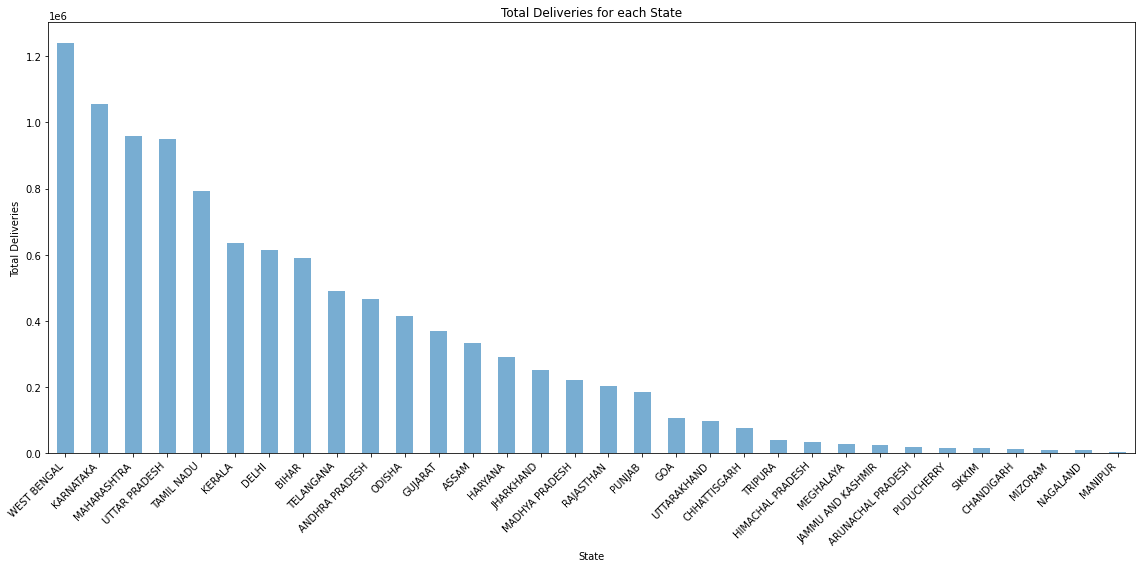

In [44]:
print("Total Deliveries for each state:")
print(state_total_deliveries_dict)

plt.figure(figsize=(16, 8))
state_total_deliveries.plot(kind='bar', color='tab:blue', alpha=0.6)
plt.xlabel('State')
plt.ylabel('Total Deliveries')
plt.title('Total Deliveries for each State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [45]:
sum(state_total_deliveries_dict.values())

10565767

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_state_heatmap(state_total_deliveries_dict, shapefile_path):
    """
    Plots a heat map on the India map showing the total deliveries per state.
    
    Args:
    state_total_deliveries_dict (dict): Dictionary with state names as keys and total deliveries as values.
    shapefile_path (str): The path to the shapefile for India.
    """
    # Convert the state total deliveries dictionary to a DataFrame
    state_counts_df = pd.DataFrame(list(state_total_deliveries_dict.items()), columns=['State', 'Total_Deliveries'])

    # Load the shapefile for India
    gdf_india = gpd.read_file(shapefile_path)
    gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()

    # Convert state names to upper case
    state_counts_df['State'] = state_counts_df['State'].str.upper()
    # Correct state names to match those in the shapefile
    state_counts_df = state_counts_df.replace({
        'State': {
            'TAMIL NADU': 'TAMILNADU',
            'CHHATTISGARH': 'CHHATTISHGARH',
            'TELANGANA': 'TELENGANA',
            'ANDAMAN & NICOBAR': 'ANDAMAN AND NICOBAR',
            'JAMMU AND KASHMIR': 'JAMMU & KASHMIR',
            'DAMAN AND DIU AND DADRA AND NAGAR HAVELI': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU'
        }
    })

    # Merge the shapefile GeoDataFrame with the deliveries counts DataFrame
    gdf_merged = gdf_india.set_index('State_Name').join(state_counts_df.set_index('State'), how='left')
    
    # Fill NaN values with 0
    gdf_merged['Total_Deliveries'] = gdf_merged['Total_Deliveries'].fillna(0)
    
    # Plot the heatmap
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf_merged.plot(column='Total_Deliveries', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title('State-wise Total Deliveries Heat Map', fontdict={'fontsize': '15', 'fontweight' : '3'})
    ax.axis('off')
    plt.show()



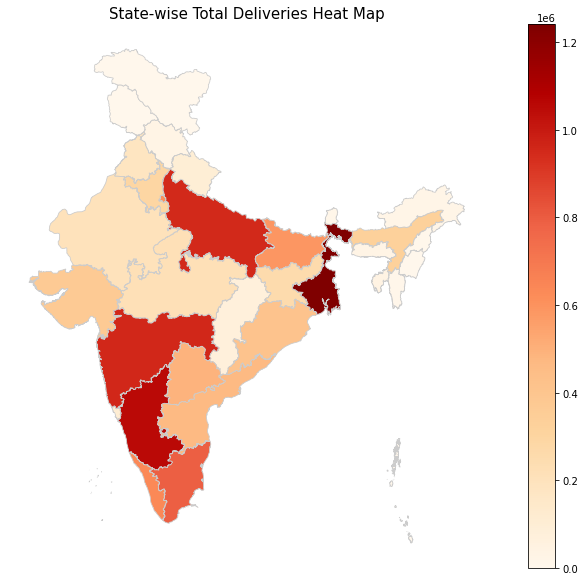

In [47]:
shapefile_path = "/home/uddeshya.singh/Experiments/India-shape" 
plot_state_heatmap(state_total_deliveries_dict, shapefile_path)

In [48]:
def load_pickle_file(path_local):
    with open(path_local, 'rb') as handle:
        loaded_file = pickle.load(handle)
        
    return loaded_file

In [49]:
google_acc_dict_dir = '/disk_5/paper/flip_methods/google/google_drift_acc/'

pincode_wise_acc_dict_google = {}

for file in tqdm(os.listdir(google_acc_dict_dir)):

    pincode = file.replace('_google_acc_dict.pickle', '')
    acc_path = os.path.join(google_acc_dict_dir, file)

    acc_dict = load_pickle_file(acc_path)

    pincode_wise_acc_dict_google[pincode] = acc_dict
    
print(len(pincode_wise_acc_dict_google))

100%|██████████| 10665/10665 [00:00<00:00, 66391.08it/s]

10665


   metric  model_1_total  model_2_total
0     100       0.548677       0.185700
1     200       0.674203       0.289035
2     500       0.792095       0.467967
3    1000       0.850092       0.606272
4    2000       0.887324       0.726642


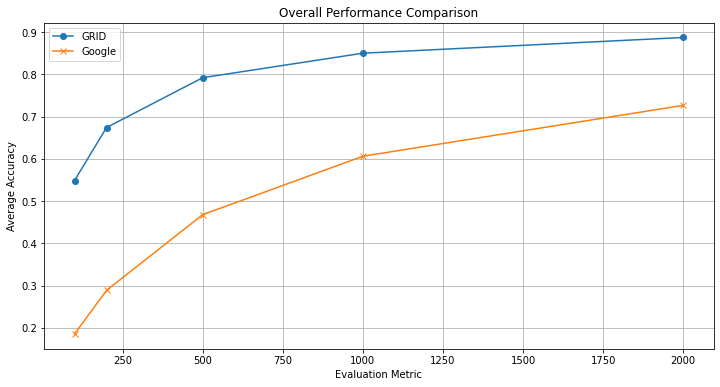

In [50]:
def overall_performance_comparison(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list):
    overall_performance = {'metric': [], 'model_1_total': [], 'model_2_total': []}
    for metric in updated_phase_I_II_pin_wise_acc_dict[common_pincode_list[0]]['per']:
        if metric not in ['rest', 'None']:
            total_model_1 = sum(updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] for pin in common_pincode_list)
            total_model_2 = sum(pincode_wise_acc_dict_google[pin]['per'][metric] for pin in common_pincode_list)
            overall_performance['metric'].append(metric)
            overall_performance['model_1_total'].append(total_model_1 / len(common_pincode_list))
            overall_performance['model_2_total'].append(total_model_2 / len(common_pincode_list))
    return overall_performance

common_pincode_list = list(set(updated_phase_I_II_pin_wise_acc_dict.keys()) & set(pincode_wise_acc_dict_google.keys())) 

overall_performance = overall_performance_comparison(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list)
df_overall_performance = pd.DataFrame(overall_performance)
print(df_overall_performance.head())

plt.figure(figsize=(12, 6))
plt.plot(df_overall_performance['metric'], df_overall_performance['model_1_total'], label='GRID', marker='o')
plt.plot(df_overall_performance['metric'], df_overall_performance['model_2_total'], label='Google', marker='x')
plt.xlabel('Evaluation Metric')
plt.ylabel('Average Accuracy')
plt.legend()
plt.title('Overall Performance Comparison')
plt.grid(True)
plt.show()

In [51]:
len(common_pincode_list)

10665

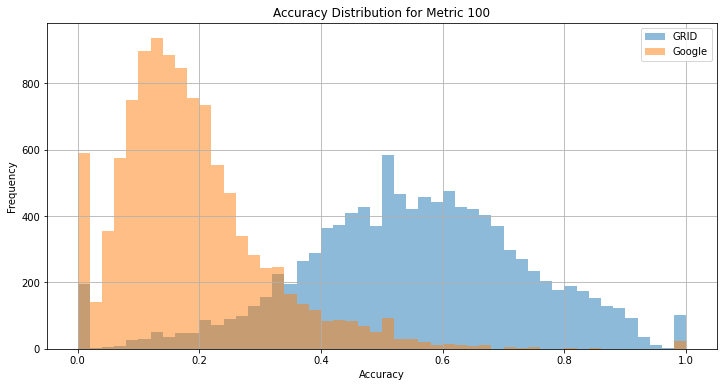

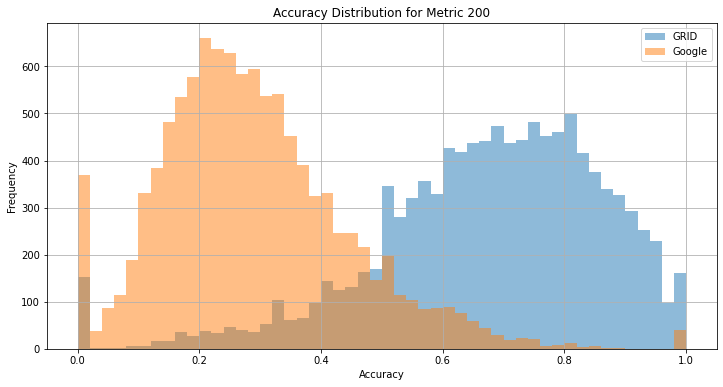

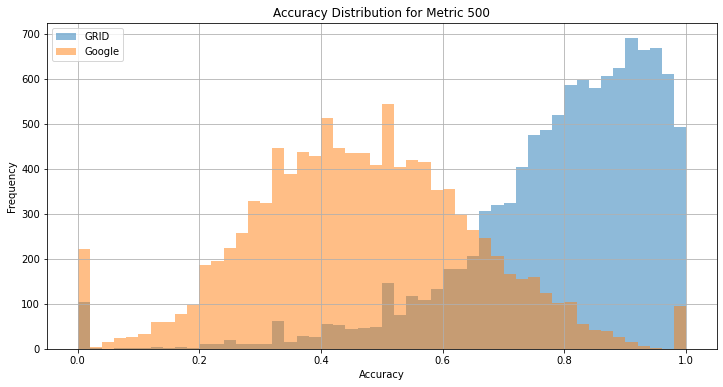

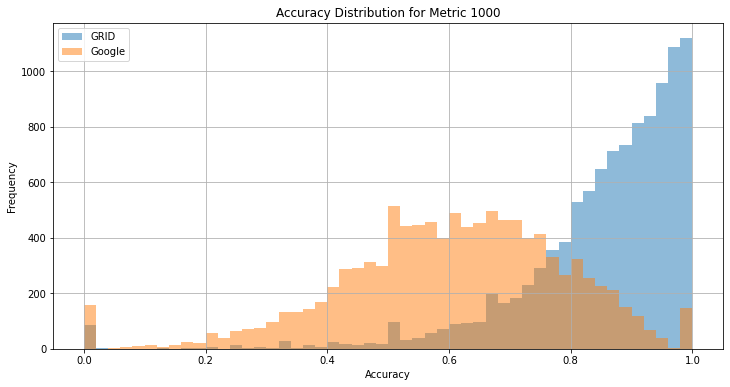

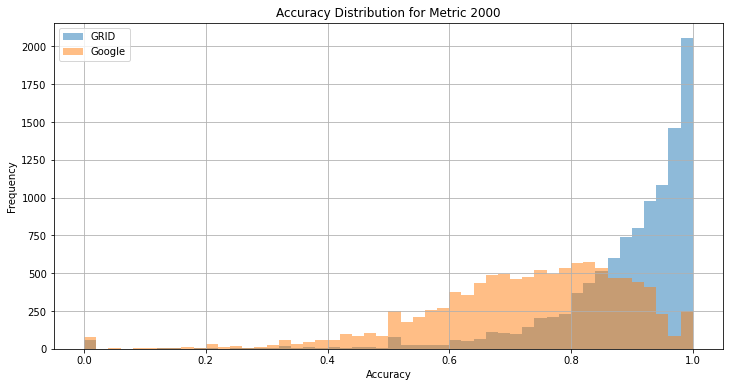

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_accuracy_distribution(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list, df_mapping):
    metrics = [100, 200, 500, 1000, 2000]
    
    for metric in metrics:
        model_1_acc = [updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] for pin in common_pincode_list]
        model_2_acc = [pincode_wise_acc_dict_google[pin]['per'][metric] for pin in common_pincode_list]
        
        plt.figure(figsize=(12, 6))
        plt.hist(model_1_acc, bins=50, alpha=0.5, label='GRID')
        plt.hist(model_2_acc, bins=50, alpha=0.5, label='Google')
        plt.xlabel('Accuracy')
        plt.ylabel('Frequency')
        plt.legend()
        plt.title(f'Accuracy Distribution for Metric {metric}')
        plt.grid(True)
        plt.show()
    return 

plot_accuracy_distribution(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list, df_mapping)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def zero_performers(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list, df_mapping):
    metrics = [500]
    zero_accuracy_details = {'Metric': [], 'Pincode': [], 'State': [], 'Model': []}
    
    for metric in metrics:        
        zero_acc_model_1 = [pin for pin in common_pincode_list if updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] < 0.02]
        zero_acc_model_2 = [pin for pin in common_pincode_list if pincode_wise_acc_dict_google[pin]['per'][metric] < 0.02]

        for pin in zero_acc_model_1:
            zero_accuracy_details['Metric'].append(metric)
            zero_accuracy_details['Pincode'].append(pin)
            zero_accuracy_details['State'].append(df_mapping[df_mapping['Pincode'] == pin]['State'].values[0])
            zero_accuracy_details['Model'].append('GRID')
        
        for pin in zero_acc_model_2:
            zero_accuracy_details['Metric'].append(metric)
            zero_accuracy_details['Pincode'].append(pin)
            zero_accuracy_details['State'].append(df_mapping[df_mapping['Pincode'] == pin]['State'].values[0])
            zero_accuracy_details['Model'].append('Google MMI')
        
    zero_accuracy_df = pd.DataFrame(zero_accuracy_details)
    return zero_accuracy_df

zero_accuracy_df = zero_performers(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list, df_mapping)

In [54]:
zero_accuracy_df[zero_accuracy_df['Model']=='GRID'].head()

Metric Pincode           State Model
0     500  495683    CHHATTISGARH  GRID
1     500  673649          KERALA  GRID
2     500  678600          KERALA  GRID
3     500  670677          KERALA  GRID
4     500  482006  MADHYA PRADESH  GRID

In [55]:
state_pincode_counts = zero_accuracy_df[zero_accuracy_df['Model']=='GRID'].groupby('State')['Pincode'].nunique()

print("Number of pincodes with zero accuracy by state:")
print(state_pincode_counts)

Number of pincodes with zero accuracy by state:
State
ANDHRA PRADESH       5
ASSAM                2
BIHAR                1
CHANDIGARH           1
CHHATTISGARH         2
DELHI                1
GUJARAT              2
HIMACHAL PRADESH     2
KARNATAKA            2
KERALA              40
MADHYA PRADESH       5
MAHARASHTRA          7
ODISHA               1
PUNJAB               4
RAJASTHAN            2
TAMIL NADU           3
TELANGANA            4
TRIPURA              1
UTTAR PRADESH        6
UTTARAKHAND          4
WEST BENGAL          8
Name: Pincode, dtype: int64


In [56]:
print(list(zero_accuracy_df[zero_accuracy_df['Model']=='GRID'][zero_accuracy_df['State'] == 'KERALA']['Pincode']))

['673649', '678600', '670677', '679125', '679516', '676310', '686025', '691519', '686568', '685569', '686124', '686591', '691324', '689125', '680673', '679312', '686597', '686026', '686640', '680603', '680672', '690557', '686035', '686030', '673578', '673617', '691320', '691518', '680572', '688558', '690570', '686032', '688010', '690554', '691315', '688543', '690566', '683586', '679124', '679344']


/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Metric: 500m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH      14
ASSAM                1
BIHAR                5
CHANDIGARH           2
CHHATTISGARH         7
DELHI                2
GUJARAT             22
HARYANA              5
HIMACHAL PRADESH     2
KARNATAKA            8
KERALA              46
MADHYA PRADESH      11
MAHARASHTRA         25
MEGHALAYA            1
ODISHA               9
PUNJAB              18
RAJASTHAN            5
TAMIL NADU          14
TELANGANA           13
TRIPURA              2
UTTAR PRADESH       13
UTTARAKHAND          4
WEST BENGAL          8
Name: Pincode, dtype: int64
State-wise Pincode Count where Model 1 is Better:
State
ANDHRA PRADESH        555
ARUNACHAL PRADESH       7
ASSAM                 367
BIHAR                 604
CHANDIGARH             38
CHHATTISGARH           99
DELHI                 105
GOA                    87
GUJARAT               570
HARYANA               221
HIMACHAL PRADESH       66
JAMMU AND KASHMIR      33
JHARKHA

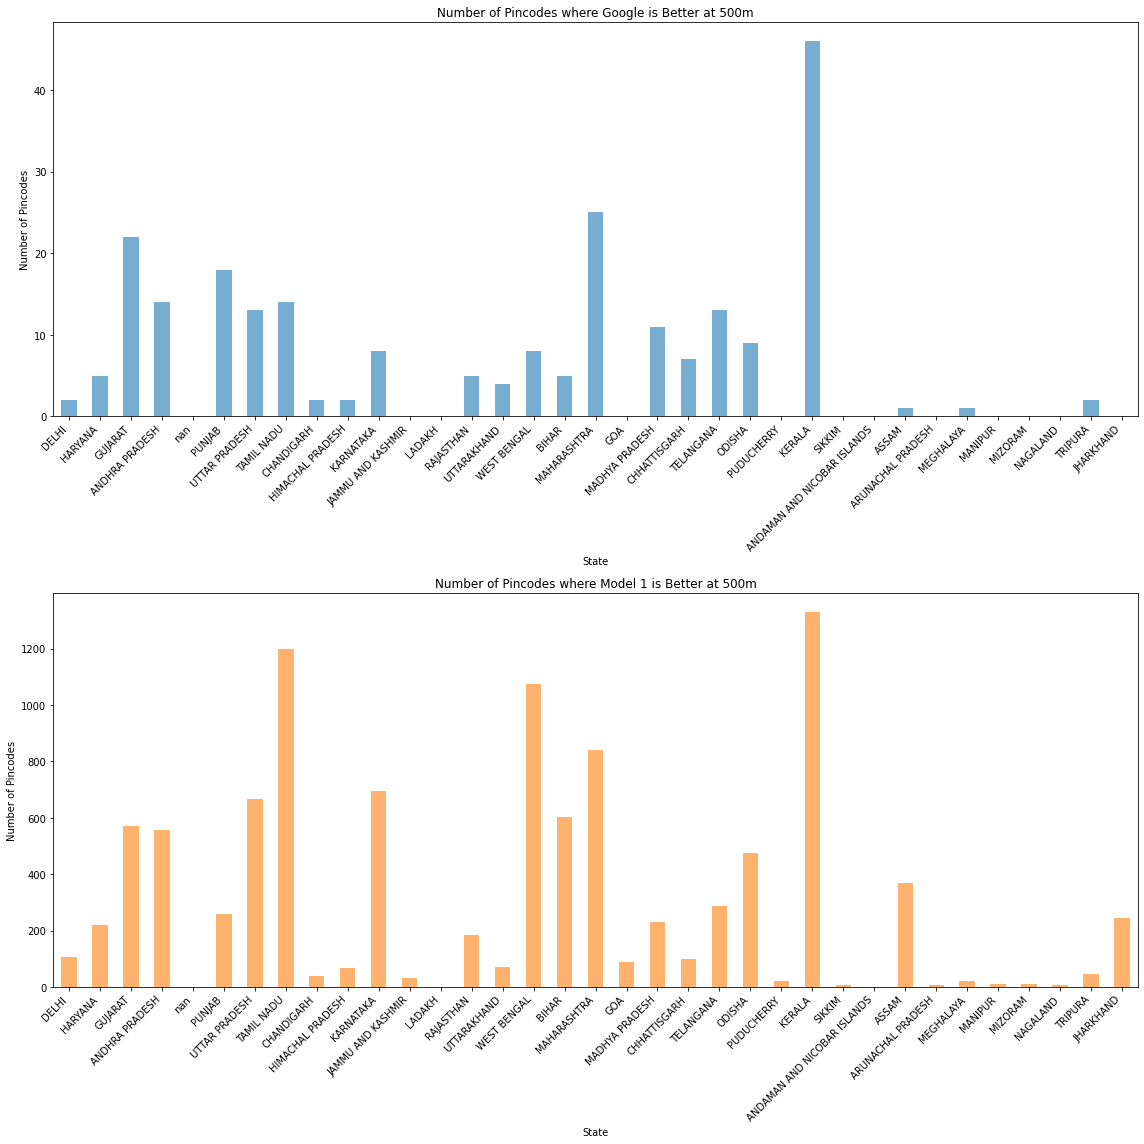

In [57]:
common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)

def get_better_performing_pincodes(metric):
    better_model_1_pincodes = []
    better_google_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] > updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_google_pincodes.append(pin_int)
        else:
            better_model_1_pincodes.append(pin_int)
    return better_model_1_pincodes, better_google_pincodes

def calculate_pincode_count(better_pincodes, df_mapping):
    state_pincode_count = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Pincode'].count()
    return state_pincode_count

metrics = [500]
results = {}

all_states = df_mapping['State'].unique()

for metric in metrics:
    better_model_1_pincodes, better_google_pincodes = get_better_performing_pincodes(metric)
    state_model_1_pincode_count = calculate_pincode_count(better_model_1_pincodes, df_mapping)
    state_google_pincode_count = calculate_pincode_count(better_google_pincodes, df_mapping)
    results[metric] = {
        'better_model_1_pincodes': better_model_1_pincodes,
        'state_model_1_pincode_count': state_model_1_pincode_count,
        'better_google_pincodes': better_google_pincodes,
        'state_google_pincode_count': state_google_pincode_count
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"State-wise Pincode Count where Google is Better:")
    print(results[metric]['state_google_pincode_count'])
    print(f"State-wise Pincode Count where Model 1 is Better:")
    print(results[metric]['state_model_1_pincode_count'])
    print()

    state_google_pincode_count = results[metric]['state_google_pincode_count'].reindex(all_states, fill_value=0)
    state_model_1_pincode_count = results[metric]['state_model_1_pincode_count'].reindex(all_states, fill_value=0)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))
    
    state_google_pincode_count.plot(kind='bar', color='tab:blue', alpha=0.6, ax=axes[0])
    axes[0].set_xlabel('State')
    axes[0].set_ylabel('Number of Pincodes')
    axes[0].set_title(f'Number of Pincodes where Google is Better at {metric}m')
    axes[0].set_xticklabels(state_google_pincode_count.index, rotation=45, ha='right')
    
    state_model_1_pincode_count.plot(kind='bar', color='tab:orange', alpha=0.6, ax=axes[1])
    axes[1].set_xlabel('State')
    axes[1].set_ylabel('Number of Pincodes')
    axes[1].set_title(f'Number of Pincodes where Model 1 is Better at {metric}m')
    axes[1].set_xticklabels(state_model_1_pincode_count.index, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()


In [58]:
df_mapping.head()

Sl No Pincode             HubName       PARTNERCENTRE     Code  State  \
0      1  110001    PaharganjHub_DEL    PaharganjHub_DEL  DEL/PHG  DELHI   
1      2  110002    DaryaganjHub_DEL    DaryaganjHub_DEL  DEL/DYJ  DELHI   
2      3  110003    DaryaganjHub_DEL    DaryaganjHub_DEL  DEL/DYJ  DELHI   
3      4  110004    PaharganjHub_DEL    PaharganjHub_DEL  DEL/PHG  DELHI   
4      5  110005  JhandewalanHub_DEL  JhandewalanHub_DEL  DEL/JWN  DELHI   

    Zone Type       Status        RCA  ... COD Current Status COD RCA  \
0  NORTH   DH  Serviceable  All Clear  ...               True     NaN   
1  NORTH   DH  Serviceable  All Clear  ...               True     NaN   
2  NORTH   DH  Serviceable  All Clear  ...               True     NaN   
3  NORTH   DH  Serviceable  All Clear  ...               True     NaN   
4  NORTH   DH  Serviceable  All Clear  ...               True     NaN   

  COD Switch Off date  COD restoration date              Myntra  \
0                 NaN                   NaN    PAHARGANJHUB_DEL   
1                 NaN                   NaN    DARYAGANJHUB_DEL   
2                 NaN                   NaN    DARYAGANJHUB_DEL   
3                 NaN                   NaN    PAHARGANJHUB_DEL   
4                 NaN                   NaN  JHANDEWALANHUB_DEL   

           check 1 Aging Embargo Aging COD  Aging Embargo Bucket Is_Common  
0  Independent_EKL           0.0       0.0                 FALSE      True  
1  Independent_EKL           0.0       0.0                 FALSE      True  
2  Independent_EKL           0.0       0.0                 FALSE      True  
3  Independent_EKL           0.0       0.0                 FALSE      True  
4  Independent_EKL           0.0       0.0                 FALSE      True  

[5 rows x 33 columns]

Metric: 2000m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH       38
ASSAM                15
BIHAR                15
CHANDIGARH            3
CHHATTISGARH         11
DELHI                 2
GOA                   2
GUJARAT              53
HARYANA              17
HIMACHAL PRADESH      3
JHARKHAND             6
KARNATAKA            38
KERALA              159
MADHYA PRADESH       20
MAHARASHTRA          67
MANIPUR               1
NAGALAND              1
ODISHA               28
PUNJAB               32
RAJASTHAN             9
TAMIL NADU           75
TELANGANA            23
TRIPURA               3
UTTAR PRADESH        33
UTTARAKHAND           3
WEST BENGAL          23
Name: Pincode, dtype: int64
State-wise Pincode Count where Model 1 is Better:
State
ANDHRA PRADESH        531
ARUNACHAL PRADESH       7
ASSAM                 353
BIHAR                 594
CHANDIGARH             37
CHHATTISGARH           95
DELHI                 105
GOA                    85
GUJARAT        

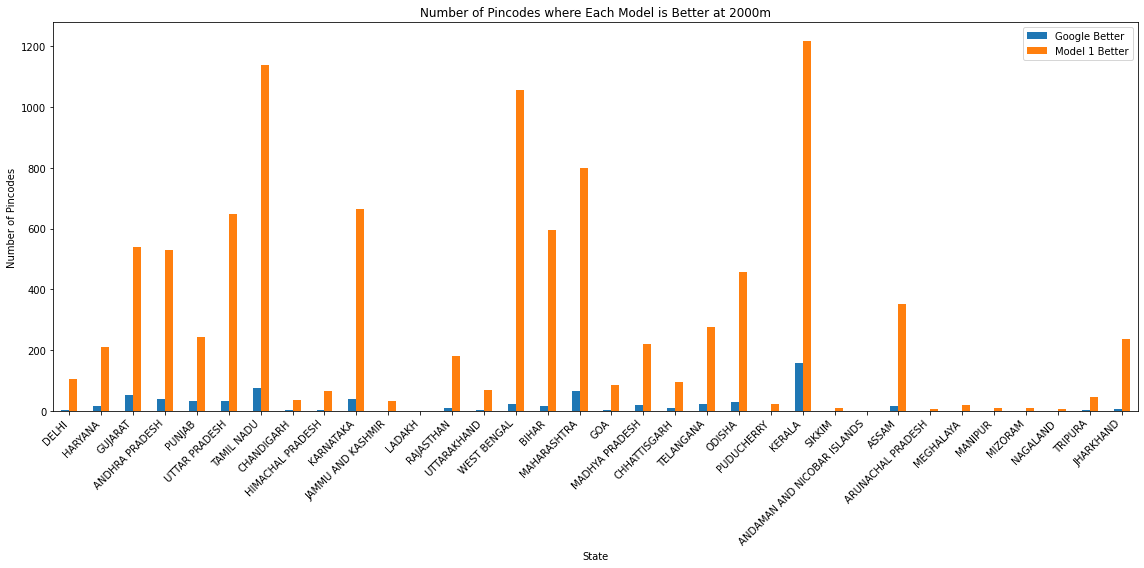

In [59]:
common_pincode_set = set(common_pincode_list)
df_mapping = df_mapping.dropna(subset=['State'])  # Remove NaN values from the 'State' column

def get_better_performing_pincodes(metric):
    better_model_1_pincodes = []
    better_google_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] > updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_google_pincodes.append(pin_int)
        else:
            better_model_1_pincodes.append(pin_int)
    return better_model_1_pincodes, better_google_pincodes

def calculate_pincode_count(better_pincodes, df_mapping):
    state_pincode_count = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Pincode'].count()
    return state_pincode_count

metrics = [2000]
results = {}

all_states = df_mapping['State'].unique()

for metric in metrics:
    better_model_1_pincodes, better_google_pincodes = get_better_performing_pincodes(metric)
    state_model_1_pincode_count = calculate_pincode_count(better_model_1_pincodes, df_mapping)
    state_google_pincode_count = calculate_pincode_count(better_google_pincodes, df_mapping)
    results[metric] = {
        'better_model_1_pincodes': better_model_1_pincodes,
        'state_model_1_pincode_count': state_model_1_pincode_count,
        'better_google_pincodes': better_google_pincodes,
        'state_google_pincode_count': state_google_pincode_count
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"State-wise Pincode Count where Google is Better:")
    print(results[metric]['state_google_pincode_count'])
    print(f"State-wise Pincode Count where Model 1 is Better:")
    print(results[metric]['state_model_1_pincode_count'])
    print()

    state_google_pincode_count = results[metric]['state_google_pincode_count'].reindex(all_states, fill_value=0)
    state_model_1_pincode_count = results[metric]['state_model_1_pincode_count'].reindex(all_states, fill_value=0)

    # Create a DataFrame to hold both counts for plotting
    combined_df = pd.DataFrame({
        'Google Better': state_google_pincode_count,
        'Model 1 Better': state_model_1_pincode_count
    })

    # Plot the combined bar plot side by side
    ax = combined_df.plot(kind='bar', figsize=(16, 8), color=['tab:blue', 'tab:orange'])
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Pincodes')
    ax.set_title(f'Number of Pincodes where Each Model is Better at {metric}m')
    ax.set_xticklabels(combined_df.index, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Metric: 2000m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH       38
ASSAM                15
BIHAR                15
CHANDIGARH            3
CHHATTISGARH         11
DELHI                 2
GOA                   2
GUJARAT              53
HARYANA              17
HIMACHAL PRADESH      3
JHARKHAND             6
KARNATAKA            38
KERALA              159
MADHYA PRADESH       20
MAHARASHTRA          67
MANIPUR               1
NAGALAND              1
ODISHA               28
PUNJAB               32
RAJASTHAN             9
TAMIL NADU           75
TELANGANA            23
TRIPURA               3
UTTAR PRADESH        33
UTTARAKHAND           3
WEST BENGAL          23
Name: Pincode, dtype: int64
State-wise Pincode Count where Model 1 is Better:
State
ANDHRA PRADESH        531
ARUNACHAL PRADESH       7
ASSAM                 353
BIHAR                 594
CHANDIGARH             37
CHHATTISGARH           95
DELHI                 105
GOA                    85
GUJARAT        

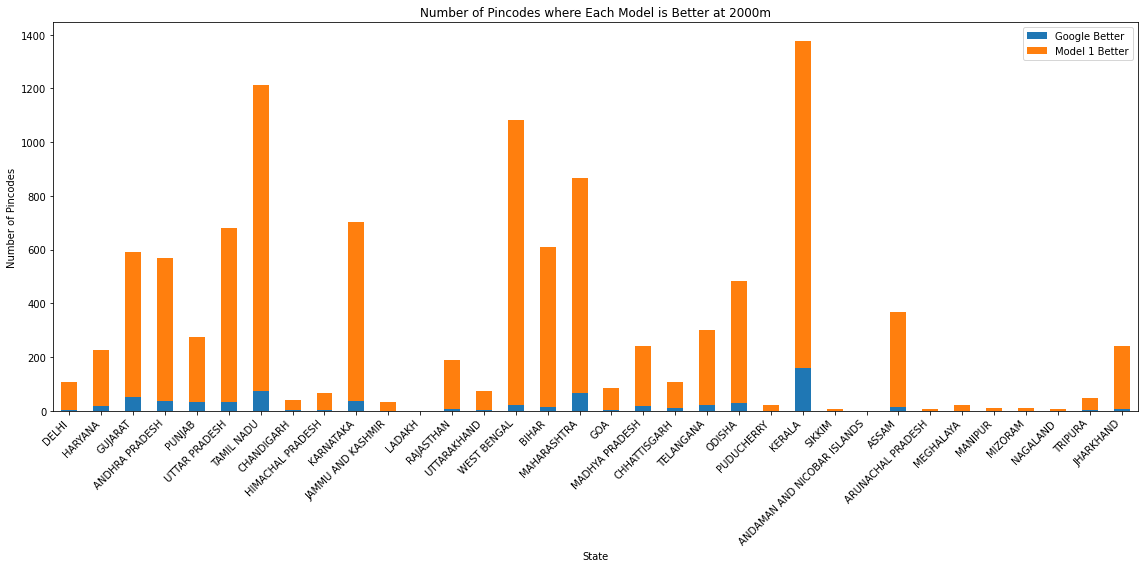

In [60]:
def get_better_performing_pincodes(metric):
    better_model_1_pincodes = []
    better_google_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin) 
        if pincode_wise_acc_dict_google[pin]['per'][metric] > updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_google_pincodes.append(pin_int)
        else:
            better_model_1_pincodes.append(pin_int)
    return better_model_1_pincodes, better_google_pincodes

def calculate_pincode_count(better_pincodes, df_mapping):
    state_pincode_count = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Pincode'].count()
    return state_pincode_count

metrics = [2000]
results = {}

all_states = df_mapping['State'].unique()

for metric in metrics:
    better_model_1_pincodes, better_google_pincodes = get_better_performing_pincodes(metric)
    state_model_1_pincode_count = calculate_pincode_count(better_model_1_pincodes, df_mapping)
    state_google_pincode_count = calculate_pincode_count(better_google_pincodes, df_mapping)
    results[metric] = {
        'better_model_1_pincodes': better_model_1_pincodes,
        'state_model_1_pincode_count': state_model_1_pincode_count,
        'better_google_pincodes': better_google_pincodes,
        'state_google_pincode_count': state_google_pincode_count
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"State-wise Pincode Count where Google is Better:")
    print(results[metric]['state_google_pincode_count'])
    print(f"State-wise Pincode Count where Model 1 is Better:")
    print(results[metric]['state_model_1_pincode_count'])
    print()

    state_google_pincode_count = results[metric]['state_google_pincode_count'].reindex(all_states, fill_value=0)
    state_model_1_pincode_count = results[metric]['state_model_1_pincode_count'].reindex(all_states, fill_value=0)

    combined_df = pd.DataFrame({
        'Google Better': state_google_pincode_count,
        'Model 1 Better': state_model_1_pincode_count
    })

    combined_df.plot(kind='bar', stacked=True, figsize=(16, 8), color=['tab:blue', 'tab:orange'])
    plt.xlabel('State')
    plt.ylabel('Number of Pincodes')
    plt.title(f'Number of Pincodes where Each Model is Better at {metric}m')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Metric: 500m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH      14
ASSAM                1
BIHAR                5
CHANDIGARH           2
CHHATTISGARH         7
DELHI                2
GUJARAT             22
HARYANA              5
HIMACHAL PRADESH     2
KARNATAKA            8
KERALA              46
MADHYA PRADESH      11
MAHARASHTRA         25
MEGHALAYA            1
ODISHA               9
PUNJAB              18
RAJASTHAN            5
TAMIL NADU          14
TELANGANA           13
TRIPURA              2
UTTAR PRADESH       13
UTTARAKHAND          4
WEST BENGAL          8
Name: Pincode, dtype: int64
State-wise Pincode Count where Model 1 is Better:
State
ANDHRA PRADESH        555
ARUNACHAL PRADESH       7
ASSAM                 367
BIHAR                 604
CHANDIGARH             38
CHHATTISGARH           99
DELHI                 105
GOA                    87
GUJARAT               570
HARYANA               221
HIMACHAL PRADESH       66
JAMMU AND KASHMIR      33
JHARKHA

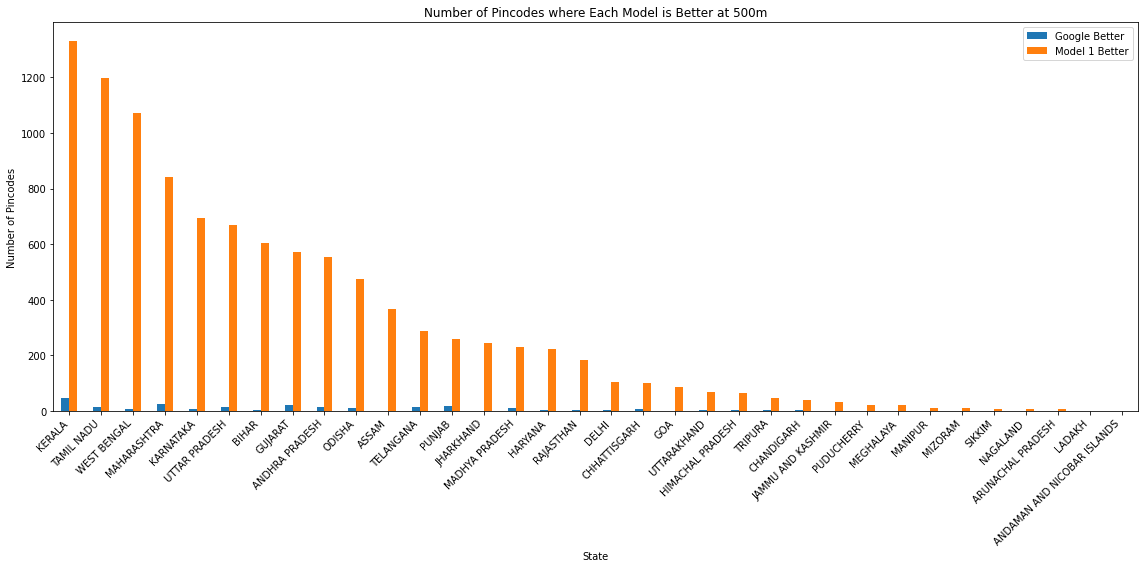

Metric: 1000m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH      22
ASSAM                3
BIHAR                8
CHANDIGARH           2
CHHATTISGARH         8
DELHI                2
GOA                  1
GUJARAT             35
HARYANA              8
HIMACHAL PRADESH     3
JHARKHAND            3
KARNATAKA           20
KERALA              78
MADHYA PRADESH      18
MAHARASHTRA         46
MANIPUR              1
ODISHA              11
PUNJAB              23
RAJASTHAN            8
TAMIL NADU          36
TELANGANA           18
TRIPURA              3
UTTAR PRADESH       20
UTTARAKHAND          4
WEST BENGAL         16
Name: Pincode, dtype: int64
State-wise Pincode Count where Model 1 is Better:
State
ANDHRA PRADESH        547
ARUNACHAL PRADESH       7
ASSAM                 365
BIHAR                 601
CHANDIGARH             38
CHHATTISGARH           98
DELHI                 105
GOA                    86
GUJARAT               557
HARYANA               218
HIMACHAL PRA

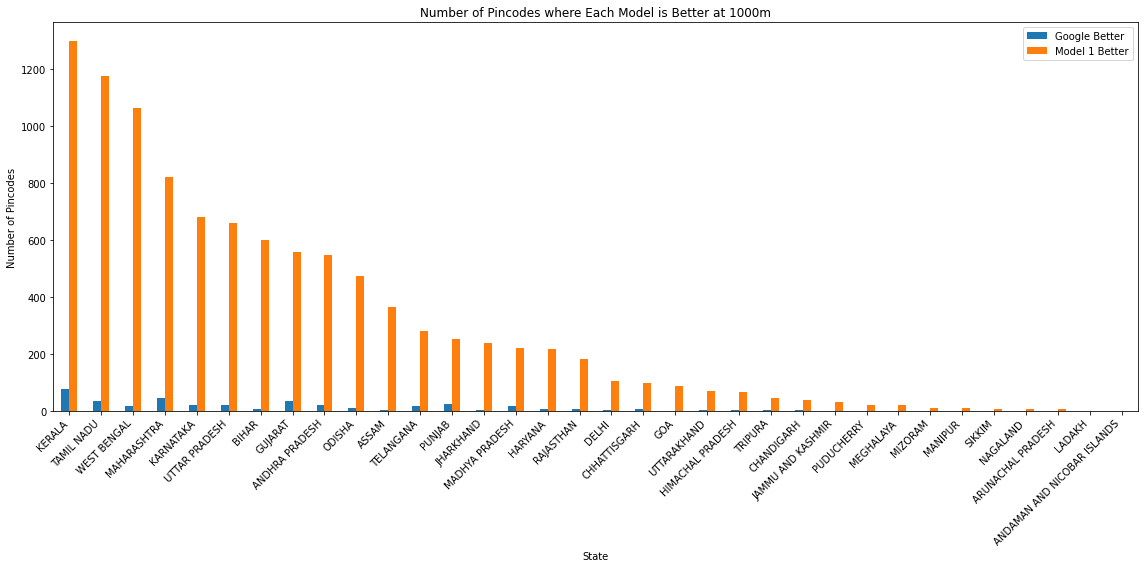

Metric: 2000m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH       38
ASSAM                15
BIHAR                15
CHANDIGARH            3
CHHATTISGARH         11
DELHI                 2
GOA                   2
GUJARAT              53
HARYANA              17
HIMACHAL PRADESH      3
JHARKHAND             6
KARNATAKA            38
KERALA              159
MADHYA PRADESH       20
MAHARASHTRA          67
MANIPUR               1
NAGALAND              1
ODISHA               28
PUNJAB               32
RAJASTHAN             9
TAMIL NADU           75
TELANGANA            23
TRIPURA               3
UTTAR PRADESH        33
UTTARAKHAND           3
WEST BENGAL          23
Name: Pincode, dtype: int64
State-wise Pincode Count where Model 1 is Better:
State
ANDHRA PRADESH        531
ARUNACHAL PRADESH       7
ASSAM                 353
BIHAR                 594
CHANDIGARH             37
CHHATTISGARH           95
DELHI                 105
GOA                    85
GUJARAT        

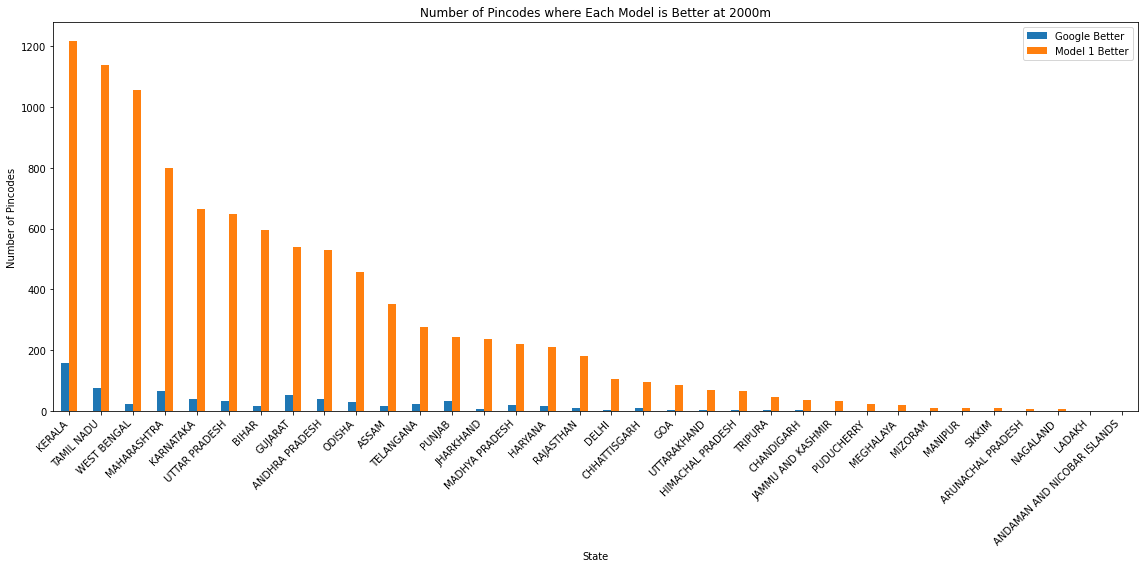

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

common_pincode_set = set(common_pincode_list)
df_mapping = df_mapping.dropna(subset=['State'])  # Remove NaN values from the 'State' column

def get_better_performing_pincodes(metric):
    better_model_1_pincodes = []
    better_google_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] > updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_google_pincodes.append(pin_int)
        else:
            better_model_1_pincodes.append(pin_int)
    return better_model_1_pincodes, better_google_pincodes

def calculate_pincode_count(better_pincodes, df_mapping):
    state_pincode_count = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Pincode'].count()
    return state_pincode_count

metrics = [500,1000,2000]
results = {}

all_states = df_mapping['State'].unique()

for metric in metrics:
    better_model_1_pincodes, better_google_pincodes = get_better_performing_pincodes(metric)
    state_model_1_pincode_count = calculate_pincode_count(better_model_1_pincodes, df_mapping)
    state_google_pincode_count = calculate_pincode_count(better_google_pincodes, df_mapping)
    results[metric] = {
        'better_model_1_pincodes': better_model_1_pincodes,
        'state_model_1_pincode_count': state_model_1_pincode_count,
        'better_google_pincodes': better_google_pincodes,
        'state_google_pincode_count': state_google_pincode_count
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"State-wise Pincode Count where Google is Better:")
    print(results[metric]['state_google_pincode_count'])
    print(f"State-wise Pincode Count where Model 1 is Better:")
    print(results[metric]['state_model_1_pincode_count'])
    print()

    state_google_pincode_count = results[metric]['state_google_pincode_count'].reindex(all_states, fill_value=0)
    state_model_1_pincode_count = results[metric]['state_model_1_pincode_count'].reindex(all_states, fill_value=0)

    # Create a DataFrame to hold both counts for plotting
    combined_df = pd.DataFrame({
        'Google Better': state_google_pincode_count,
        'Model 1 Better': state_model_1_pincode_count
    })

    # Sort the DataFrame based on 'Model 1 Better' counts in descending order
    combined_df = combined_df.sort_values(by='Model 1 Better', ascending=False)

    # Plot the combined bar plot side by side
    ax = combined_df.plot(kind='bar', figsize=(16, 8), color=['tab:blue', 'tab:orange'])
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Pincodes')
    ax.set_title(f'Number of Pincodes where Each Model is Better at {metric}m')
    ax.set_xticklabels(combined_df.index, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


10565767
   metric  model_1_total  model_2_total
0     100       0.669346       0.265287
1     200       0.800337       0.392582
2     500       0.894832       0.584026
3    1000       0.932352       0.714973
4    2000       0.955097       0.818625


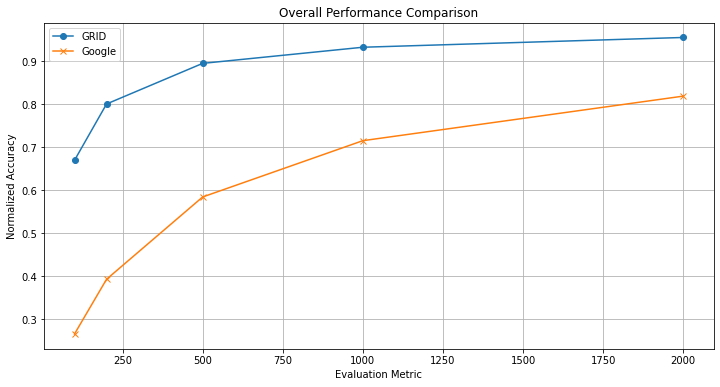

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

def overall_performance_comparison(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list, state_total_deliveries_dict):
    total_deliveries = sum(state_total_deliveries_dict.values())
    print(total_deliveries)
    overall_performance = {'metric': [], 'model_1_total': [], 'model_2_total': []}
    
    for metric in updated_phase_I_II_pin_wise_acc_dict[common_pincode_list[0]]['per']:
        if metric not in ['rest', 'None']:
            total_model_1 = sum(updated_phase_I_II_pin_wise_acc_dict[pin]['num'][metric] for pin in common_pincode_list)
            total_model_2 = sum(pincode_wise_acc_dict_google[pin]['num'][metric] for pin in common_pincode_list)
            overall_performance['metric'].append(metric)
            overall_performance['model_1_total'].append(total_model_1 / total_deliveries)
            overall_performance['model_2_total'].append(total_model_2 / total_deliveries)
    
    return overall_performance

common_pincode_list = list(set(updated_phase_I_II_pin_wise_acc_dict.keys()) & set(pincode_wise_acc_dict_google.keys())) 

overall_performance = overall_performance_comparison(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list, state_total_deliveries_dict)
df_overall_performance = pd.DataFrame(overall_performance)
print(df_overall_performance.head())

plt.figure(figsize=(12, 6))
plt.plot(df_overall_performance['metric'], df_overall_performance['model_1_total'], label='GRID', marker='o')
plt.plot(df_overall_performance['metric'], df_overall_performance['model_2_total'], label='Google', marker='x')
plt.xlabel('Evaluation Metric')
plt.ylabel('Normalized Accuracy')
plt.legend()
plt.title('Overall Performance Comparison')
plt.grid(True)
plt.show()
